Zadanie 1. 

Wczytać dane z pliku nba1.csv. Utworzyć następujący wykres punktowy (scatter plot): 

na osi x umieścić zmienną 'Height cm'
na osi y - 'Weight'
Dla każdej wartości 'Position' punkty mają być innego koloru
Rozmiar punktów ma być proporcjonalny do 'Salary' (przeskalować dane, by były różnice między puntami były widoczne)
Etykiety przy osiach - odpowiednio Height cm, Weight (pounds lub cm w zależności czy przeliczone na cm)
Legenda odzwierciedla, który kolor odpowiada za którą pozycję. Ustawić odpowiedni tytuł dla legendy i całego wykresu. 
Zinterpretować wykres - czy zarobki zależą od którejś z pozostałych zmiennych? czy jest różnica wzrostu dla zawodników w zależności od pozycji? 

In [129]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [130]:
# Wczytać dane z pliku nba1.csv. Utworzyć następujący wykres punktowy (scatter plot): 

# na osi x umieścić zmienną 'Height cm'
# na osi y - 'Weight'
# Dla każdej wartości 'Position' punkty mają być innego koloru

nba1 = pd.read_csv('nba1.csv')

nba1['Position'].unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

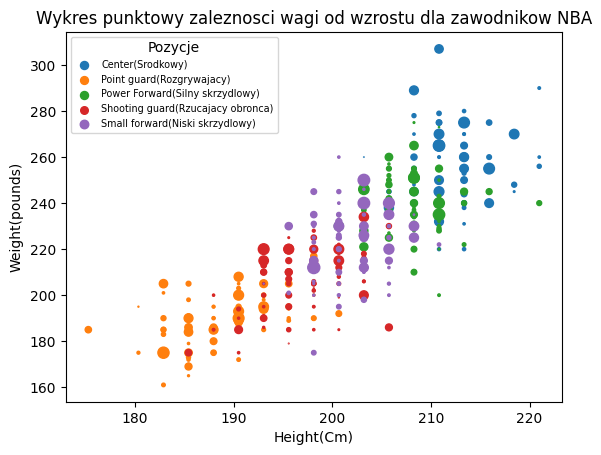

In [131]:
# Dla każdej wartości 'Position' punkty mają być innego koloru
# Rozmiar punktów ma być proporcjonalny do 'Salary' (przeskalować dane, by były różnice między puntami były widoczne)
# Etykiety przy osiach - odpowiednio Height cm, Weight (pounds lub cm w zależności czy przeliczone na cm)
# Legenda odzwierciedla, który kolor odpowiada za którą pozycję. Ustawić odpowiedni tytuł dla legendy i całego wykresu. 
# Zinterpretować wykres - czy zarobki zależą od którejś z pozostałych zmiennych? czy jest różnica wzrostu dla zawodników w zależności od pozycji? 
# # sprobujmy narysowac wykorzystujac groupby
nba2 = nba1.copy()
# tlumaczymy to co znajduje sie w kolumnie position
nba2['Position'] = nba1['Position'].replace({'C':'Center(Srodkowy)','PF':'Power Forward(Silny skrzydlowy)',"PG":'Point guard(Rozgrywajacy)',"SF":'Small forward(Niski skrzydlowy)','SG':'Shooting guard(Rzucajacy obronca)'})

# skalowanie zarobkow 

nba2['Salary_std'] = (nba2['Salary'] - nba2['Salary'].min()) / (nba2['Salary'].max()-nba2['Salary'].min())
nba2['Salary_scaled'] = nba2['Salary_std']*75 # klasyczne skalowanie mini maxowe cyzli X_std * (max-min) + min dawało dalej zbyt duza skale
# dodatkowo czesc wierszy nie ma podanych zarobkow na potrzeby wizualizacji usuniemy te wiersze

nba2 = nba2.dropna(how = 'any')

# grupujemy ramke danych po pozycjach aby nastepnie odnosic sie do oczekiwanych grup na wykresie
groups = nba2.groupby('Position')
fig,ax = plt.subplots()

for name,group in groups:
    plt.scatter(x=group['Height cm'], y=group['Weight'],label = name, s = group['Salary_scaled'])
ax.legend(fontsize = 'x-small',title = 'Pozycje')
plt.xlabel('Height(Cm)')
plt.ylabel('Weight(pounds)')
plt.title('Wykres punktowy zaleznosci wagi od wzrostu dla zawodnikow NBA')
plt.show()

Zdecydowanie widzimy roznice wzrostu w zaleznosci od pozycji. Jednak na podstawie tego wykresu wydaje sie, ze nie mozemy powiedziec nic na temat zalleznosci zarobkow od pozycji.

Zadanie 2. 

Przed wykonaniem zalecam poszukanie informacji i przykładów użycia funkcji .resample() w pandas oraz o parametrze parse_dates dla funkcji .read_csv()

Wczytać dane z pliku stock_price.csv. Utworzyć następujący 4 wykresy liniowe na jednym obrazku: 

na osi x umieścić nazwy miesięcy
na osi y - średnia wartość ceny w poszczególnych miesiącach dla ceny otwarcia, min, max i ceny zamknięcia
Tytuł wykresu - Średnia wartość cen akcji
Etykiety przy osiach - odpowiednio średnia cena akcji w $, miesiąc  
Legenda odzwierciedla, który wykres odpowiada za którą z cen. 
Zinterpretować wykres - W jakim stopniu miesięczne średnie ceny (otwarcia, min, max, zamknięcia) akcji są od siebie zależne? Czy jest sens umieszczać 4 takie średnie na jednym wykresie? W którym miesiącu ceny były najniższe, a kiedy najwyższe?  

In [145]:
# wczytanie danych 
stock_price = pd.read_csv('stock_price.csv',parse_dates=['Date'])

stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Open    252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Close   252 non-null    float64       
 5   Volume  252 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.9+ KB


In [146]:
# dodajemy kolumne z miesiacami (nazwami)
stock_price['Month']= stock_price['Date'].dt.month
stock_price['Year'] = stock_price['Date'].dt.year
   

In [147]:
stock_price.sort_values(by = 'Date',ascending= True)


,Date,Open,High,Low,Close,Volume,Month,Year
251,2022-03-08,50.56,51.91,50.51,50.68,"154,105",3,2022
250,2022-03-09,51.29,52.04,50.20,50.49,"191,276",3,2022
249,2022-03-10,49.99,51.84,49.99,51.64,"107,160",3,2022
248,2022-03-11,51.85,52.89,51.05,51.16,"104,707",3,2022
247,2022-03-14,51.31,52.72,51.16,52.61,"175,280",3,2022
...,...,...,...,...,...,...,...,...
4,2023-03-02,33.72,34.13,33.47,33.88,"91,746",3,2023
3,2023-03-03,34.00,34.14,33.63,33.98,"60,168",3,2023
2,2023-03-06,33.98,34.03,33.07,33.35,"104,321",3,2023
1,2023-03-07,33.22,33.85,33.11,33.77,"89,948",3,2023


stworzymy ramke danych zawierajaca srednia wartosc ceny otwarcia, min, max i ceny zamknięcia

In [150]:
miesiace = stock_price.groupby(by = ['Month','Year'])[['Open','High','Low','Close']].mean()
miesiace =  miesiace.reset_index().sort_values(by = ['Year','Month'])
miesiace['Month'] = miesiace['Month'].dt.month_name()

AttributeError: Can only use .dt accessor with datetimelike values